In [4]:
import pickle
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import os

# load histories 
def load_history(path):
    with open(path, 'rb') as file:
        data = pickle.load(file)
    return data

print("TF Version: ", tf.__version__)

TF Version:  2.4.1


In [11]:
#directories
baseline_dir = './trained_models_histories/from_start_baseline'
penalty_001_dir = './trained_models_histories/from_start_1e-2'
penalty_05_dir = './trained_models_histories/from_start_5e-1'

results_dir = './results'

In [8]:
#validation losses

#baseline
val_history_baseline_1 = load_history('./trained_models_histories/from_start_baseline/model_1/from_start_normal_class_val_history.pkl')
val_history_baseline_2 = load_history('./trained_models_histories/from_start_baseline/model_2/from_start_normal_class_val_history_2.pkl')
val_history_baseline_3 = load_history('./trained_models_histories/from_start_baseline/model_3/from_start_normal_class_val_history_3.pkl')

#1e-2 penalty
val_history_001_1 = load_history('./trained_models_histories/from_start_1e-2/model_1/from_start_class_val_history.pkl')
val_history_001_2 = load_history('./trained_models_histories/from_start_1e-2/model_2/from_start_class_val_history_2.pkl')
val_history_001_3 = load_history('./trained_models_histories/from_start_1e-2/model_3/from_start_class_val_history_3.pkl')

# 0.5 penalty
val_history_0_5_1 = load_history('./trained_models_histories/from_start_5e-1/model_1/from_start_5e-1_class_val_history.pkl')
val_history_0_5_2 = load_history('./trained_models_histories/from_start_5e-1/model_2/from_start_5e-1_class_val_history_2.pkl')
val_history_0_5_3 = load_history('./trained_models_histories/from_start_5e-1/model_3/from_start_5e-1_class_val_history_3.pkl')


#1e-2 reversed

val_history_reversed_1 = load_history('./trained_models_histories/from_start_1e-2_reversed/model_1/from_start_reversed_class_val_history.pkl')
val_history_reversed_2 = load_history('./trained_models_histories/from_start_1e-2_reversed/model_2/from_start_reversed_class_val_history_2.pkl')
val_history_reversed_3 = load_history('./trained_models_histories/from_start_1e-2_reversed/model_3/from_start_reversed_class_val_history_3.pkl')


In [30]:
#train losses

#baseline
train_history_baseline_1 = load_history('./trained_models_histories/from_start_baseline/model_1/from_start_normal_train_history.pkl')
train_history_baseline_2 = load_history('./trained_models_histories/from_start_baseline/model_2/from_start_normal_train_history_2.pkl')
train_history_baseline_3 = load_history('./trained_models_histories/from_start_baseline/model_3/from_start_normal_train_history_3.pkl')

#1e-2 penalty
train_history_001_1 = load_history('./trained_models_histories/from_start_1e-2/model_1/from_start_train_history.pkl')
train_history_001_2 = load_history('./trained_models_histories/from_start_1e-2/model_2/from_start_train_history_2.pkl')
train_history_001_3 = load_history('./trained_models_histories/from_start_1e-2/model_3/from_start_train_history_3.pkl')

# 0.5 penalty
train_history_0_5_1 = load_history('./trained_models_histories/from_start_5e-1/model_1/from_start_5e-1_train_history.pkl')
train_history_0_5_2 = load_history('./trained_models_histories/from_start_5e-1/model_2/from_start_5e-1_train_history_2.pkl')
train_history_0_5_3 = load_history('./trained_models_histories/from_start_5e-1/model_3/from_start_5e-1_train_history_3.pkl')


#1e-2 reversed

train_history_001_r_1 = load_history('./trained_models_histories/from_start_1e-2_reversed/model_1/from_start_reversed_train_history.pkl')
train_history_001_r_2 = load_history('./trained_models_histories/from_start_1e-2_reversed/model_2/from_start_reversed_train_history_2.pkl')
train_history_001_r_3 = load_history('./trained_models_histories/from_start_1e-2_reversed/model_3/from_start_reversed_train_history_3.pkl')


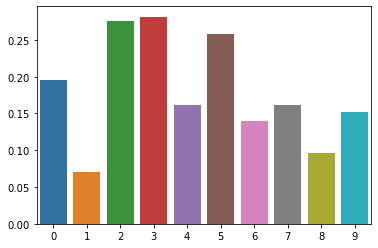

[0.19532955741882324, 0.0707237456607345, 0.275629802942276, 0.28157458782196043, 0.16110662913508714, 0.2578381477594376, 0.13984909147024155, 0.16180160541832447, 0.09683626790065318, 0.1526340505667031]


In [36]:
classes = []
final_accs = []
for key, val, in val_history_baseline_3.class_histories.items():
    classes.append(key)
    final_accs.append(val.history['loss'][-1])
    
sns.barplot(x=classes, y=final_accs)
plt.show()
print(final_accs)

In [10]:
from FocusTraining.utils import *

#load class validation loss into dataframe
baseline_loss_1 = get_by_class_metrics(val_history_baseline_1, metric='loss')
baseline_loss_2 = get_by_class_metrics(val_history_baseline_2, metric='loss')
baseline_loss_3 = get_by_class_metrics(val_history_baseline_3, metric='loss')


penalty_001_loss_1 = get_by_class_metrics(val_history_001_1, metric='loss')
penalty_001_loss_2 = get_by_class_metrics(val_history_001_2, metric='loss')
penalty_001_loss_3 = get_by_class_metrics(val_history_001_3, metric='loss')

penalty_05_loss_1 = get_by_class_metrics(val_history_0_5_1, metric='loss')
penalty_05_loss_2 = get_by_class_metrics(val_history_0_5_2, metric='loss')
penalty_05_loss_3 = get_by_class_metrics(val_history_0_5_3, metric='loss')

penalty_001_r_loss_1 = get_by_class_metrics(val_history_reversed_1, metric='loss')
penalty_001_r_loss_2 = get_by_class_metrics(val_history_reversed_2, metric='loss')
penalty_001_r_loss_3 = get_by_class_metrics(val_history_reversed_3, metric='loss')

#load class accuracy into dataframe
baseline_acc_1 = get_by_class_metrics(val_history_baseline_1, metric='acc')
baseline_acc_2 = get_by_class_metrics(val_history_baseline_2, metric='acc')
baseline_acc_3 = get_by_class_metrics(val_history_baseline_3, metric='acc')


penalty_001_acc_1 = get_by_class_metrics(val_history_001_1, metric='acc')
penalty_001_acc_2 = get_by_class_metrics(val_history_001_2, metric='acc')
penalty_001_acc_3 = get_by_class_metrics(val_history_001_3, metric='acc')

penalty_05_acc_1 = get_by_class_metrics(val_history_0_5_1, metric='acc')
penalty_05_acc_2 = get_by_class_metrics(val_history_0_5_2, metric='acc')
penalty_05_acc_3 = get_by_class_metrics(val_history_0_5_3, metric='acc')

penalty_001_r_acc_1 = get_by_class_metrics(val_history_reversed_1, metric='acc')
penalty_001_r_acc_2 = get_by_class_metrics(val_history_reversed_2, metric='acc')
penalty_001_r_acc_3 = get_by_class_metrics(val_history_reversed_3, metric='acc')


In [14]:
#save class validation loss into csv
baseline_loss_1.to_csv(os.path.join(results_dir,'baseline','baseline_loss_1.csv'))
baseline_loss_2.to_csv(os.path.join(results_dir,'baseline','baseline_loss_2.csv'))
baseline_loss_3.to_csv(os.path.join(results_dir,'baseline','baseline_loss_3.csv'))

penalty_001_loss_1.to_csv(os.path.join(results_dir, 'penalty_1e-2', 'penalty_001_loss_1.csv'))
penalty_001_loss_2.to_csv(os.path.join(results_dir, 'penalty_1e-2', 'penalty_001_loss_2.csv'))
penalty_001_loss_3.to_csv(os.path.join(results_dir, 'penalty_1e-2', 'penalty_001_loss_3.csv'))

penalty_05_loss_1.to_csv(os.path.join(results_dir, 'penalty_5e-1', 'penalty_05_loss_1.csv'))
penalty_05_loss_2.to_csv(os.path.join(results_dir, 'penalty_5e-1', 'penalty_05_loss_2.csv'))
penalty_05_loss_3.to_csv(os.path.join(results_dir, 'penalty_5e-1', 'penalty_05_loss_3.csv'))

penalty_001_r_loss_1.to_csv(os.path.join(results_dir, 'penalty_1e-2_rev', 'penalty_001_r_loss_1.csv'))
penalty_001_r_loss_2.to_csv(os.path.join(results_dir, 'penalty_1e-2_rev', 'penalty_001_r_loss_2.csv'))
penalty_001_r_loss_3.to_csv(os.path.join(results_dir, 'penalty_1e-2_rev', 'penalty_001_r_loss_3.csv'))

#save class accuracy into csv
baseline_acc_1.to_csv(os.path.join(results_dir, 'baseline', 'baseline_acc_1.csv'))
baseline_acc_2.to_csv(os.path.join(results_dir, 'baseline', 'baseline_acc_2.csv'))
baseline_acc_3.to_csv(os.path.join(results_dir, 'baseline', 'baseline_acc_3.csv'))

penalty_001_acc_1.to_csv(os.path.join(results_dir, 'penalty_1e-2', 'penalty_001_acc_1.csv'))
penalty_001_acc_2.to_csv(os.path.join(results_dir, 'penalty_1e-2', 'penalty_001_acc_2.csv'))
penalty_001_acc_3.to_csv(os.path.join(results_dir, 'penalty_1e-2', 'penalty_001_acc_3.csv'))

penalty_05_acc_1.to_csv(os.path.join(results_dir, 'penalty_5e-1', 'penalty_05_acc_1.csv'))
penalty_05_acc_2.to_csv(os.path.join(results_dir, 'penalty_5e-1', 'penalty_05_acc_2.csv'))
penalty_05_acc_3.to_csv(os.path.join(results_dir, 'penalty_5e-1', 'penalty_05_acc_3.csv'))

penalty_001_r_acc_1.to_csv(os.path.join(results_dir, 'penalty_1e-2_rev', 'penalty_001_r_acc_1.csv'))
penalty_001_r_acc_2.to_csv(os.path.join(results_dir, 'penalty_1e-2_rev', 'penalty_001_r_acc_2.csv'))
penalty_001_r_acc_3.to_csv(os.path.join(results_dir, 'penalty_1e-2_rev', 'penalty_001_r_acc_3.csv'))


In [31]:
#save train history to csv
pd.DataFrame.from_dict(train_history_baseline_1.history).to_csv(os.path.join(results_dir,'baseline','baseline_trainloss_1.csv'))
pd.DataFrame.from_dict(train_history_baseline_2.history).to_csv(os.path.join(results_dir,'baseline','baseline_trainloss_2.csv'))
pd.DataFrame.from_dict(train_history_baseline_3.history).to_csv(os.path.join(results_dir,'baseline','baseline_trainloss_3.csv'))

pd.DataFrame.from_dict(train_history_001_1.history).to_csv(os.path.join(results_dir,'penalty_1e-2','penalty_001_trainloss_1.csv'))
pd.DataFrame.from_dict(train_history_001_2.history).to_csv(os.path.join(results_dir,'penalty_1e-2','penalty_001_trainloss_2.csv'))
pd.DataFrame.from_dict(train_history_001_3.history).to_csv(os.path.join(results_dir,'penalty_1e-2','penalty_001_trainloss_3.csv'))

pd.DataFrame.from_dict(train_history_0_5_1.history).to_csv(os.path.join(results_dir,'penalty_5e-1','penalty_05_trainloss_1.csv'))
pd.DataFrame.from_dict(train_history_0_5_2.history).to_csv(os.path.join(results_dir,'penalty_5e-1','penalty_05_trainloss_2.csv'))
pd.DataFrame.from_dict(train_history_0_5_3.history).to_csv(os.path.join(results_dir,'penalty_5e-1','penalty_05_trainloss_3.csv'))

pd.DataFrame.from_dict(train_history_001_r_1.history).to_csv(os.path.join(results_dir,'penalty_1e-2_rev','penalty_001_r_trainloss_1.csv'))
pd.DataFrame.from_dict(train_history_001_r_2.history).to_csv(os.path.join(results_dir,'penalty_1e-2_rev','penalty_001_r_trainloss_2.csv'))
pd.DataFrame.from_dict(train_history_001_r_3.history).to_csv(os.path.join(results_dir,'penalty_1e-2_rev','penalty_001_r_trainloss_3.csv'))


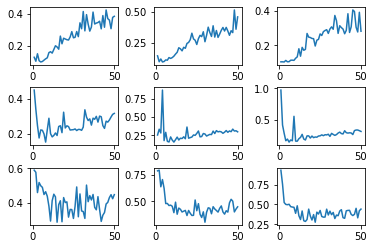

In [3]:
from FocusTraining.utils import *

history_dict = {"base_1" : val_history_baseline_1,
                "base_2" : val_history_baseline_2,
                "base_3" : val_history_baseline_3,
                "1e-2_1" : val_history_001_1,
                "1e_2_2" : val_history_001_2,
                "1e-2_3" : val_history_001_3,
                "0.5_1"  : val_history_0_5_1,
                "0.5_2"  : val_history_0_5_2,
                "0.5_3"  : val_history_0_5_3,
                }

x = list(range(1,51))

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(3, 3, 1)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_baseline_1),ax=ax)
ax = fig.add_subplot(3, 3, 2)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_baseline_2),ax=ax)
ax = fig.add_subplot(3, 3, 3)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_baseline_3),ax=ax)

ax = fig.add_subplot(3, 3, 4)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_001_1),ax=ax)
ax = fig.add_subplot(3, 3, 5)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_001_2),ax=ax)
ax = fig.add_subplot(3, 3, 6)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_001_3),ax=ax)

ax = fig.add_subplot(3, 3, 7)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_0_5_1),ax=ax)
ax = fig.add_subplot(3, 3, 8)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_0_5_2),ax=ax)
ax = fig.add_subplot(3, 3, 9)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_0_5_3),ax=ax)

plt.show()

In [15]:
get_max_class_per_epoch(val_history_baseline_1)

array([0.12678355, 0.10188432, 0.14884189, 0.10530052, 0.09730227,
       0.10040243, 0.10885579, 0.11704603, 0.12342704, 0.15597299,
       0.16146143, 0.15286806, 0.17545234, 0.19883418, 0.19120469,
       0.17734471, 0.25932765, 0.21116392, 0.24604106, 0.24120115,
       0.23665268, 0.23475406, 0.25409572, 0.2871949 , 0.24872999,
       0.25173114, 0.28786446, 0.2559587 , 0.34241259, 0.30536339,
       0.41322356, 0.2919872 , 0.39369686, 0.33459859, 0.29048667,
       0.31618501, 0.40966708, 0.33498114, 0.34066457, 0.34419725,
       0.35239283, 0.30471366, 0.38773176, 0.31466173, 0.42288773,
       0.36870358, 0.35964079, 0.30563839, 0.376572  , 0.38323257])

In [67]:
from pprint import pprint
def get_avg_class_loss(val_history):
    return float(np.mean(get_by_class_metrics(val_history).tail(1), axis=1))

avg_loss = {model:get_avg_class_loss(history) for model,history in history_dict.items()}

pprint(avg_loss)

{'0.5_1': 0.2512032061949081,
 '0.5_2': 0.2249112455648493,
 '0.5_3': 0.2349491605447663,
 '1e-2_1': 0.19951845878413296,
 '1e-2_3': 0.19528705449973352,
 '1e_2_2': 0.19627775738178752,
 'base_1': 0.19024388780763202,
 'base_2': 0.20205394280673036,
 'base_3': 0.17933234860942412}


In [11]:
print("Normal loss 1: ", val_history_baseline_1.history['loss'][-1])
print("Normal loss 2: ", val_history_baseline_2.history['loss'][-1])
print("Normal loss 3: ", val_history_baseline_3.history['loss'][-1])

Normal loss 1:  0.19024388780763202
Normal loss 2:  0.20205394280673036
Normal loss 3:  0.17933234860942412


In [70]:
# reversed method
val_history_reversed_1 = load_history('from_start_reversed_class_val_history.pkl')
val_history_reversed_2 = load_history('from_start_reversed_class_val_history_2.pkl')
val_history_reversed_3 = load_history('from_start_reversed_class_val_history_3.pkl')


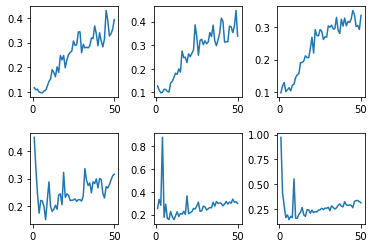

In [73]:
x = list(range(1,51))

fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 3, 1)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_reversed_1),ax=ax)
ax = fig.add_subplot(2, 3, 2)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_reversed_2),ax=ax)
ax = fig.add_subplot(2, 3, 3)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_reversed_3),ax=ax)

ax = fig.add_subplot(2, 3, 4)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_001_1),ax=ax)
ax = fig.add_subplot(2, 3, 5)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_001_2),ax=ax)
ax = fig.add_subplot(2, 3, 6)
sns.lineplot(x=x, y = get_max_class_per_epoch(val_history_001_3),ax=ax)

plt.show()

In [72]:
reversed_dict = {
    'r1' : val_history_reversed_1,
    'r2' : val_history_reversed_2,
    'r3' : val_history_reversed_3
}

avg_loss_reversed  = {model:get_avg_class_loss(history) for model,history in reversed_dict.items()}
pprint(avg_loss_reversed)

{'r1': 0.19545342848321887,
 'r2': 0.22524296230332402,
 'r3': 0.19679086452917544}
